In [1]:
import sys
import os

In [2]:
#STASCAN_PATH = "../../" 
vignettes_path = "../../Vignettes/Fawkner-Corbett_Intestinal_Slide6/" 
output_path = "./"

# You can optionally set the parameter 'epochs=2' to quickly test the pipeline, but you should set the parameter 'epochs=50' for the official run in this demo.   

#epochs = 2
epochs = 50

In [3]:
#sys.path.append(STASCAN_PATH)
import STASCAN


In [6]:
label_list = ['Epithelium', 'Fibroblasts', 'Muscularis', 'Neural'] # The list of cell types.
color_list = ["purple", "orange", "red", "gold"]
dict_label = dict(zip(label_list, color_list))


crop_size = 40 # Pixel radius of spot images.
raw_image = vignettes_path + "/A6.jpg" # The original H&E staining image, used for Space Ranger previously.
adjacent_image = vignettes_path+"/Simulated_A7.jpg"


In [5]:
## Module 1: Cell annotation for unseen spots 

if not os.path.exists(output_path + "/Module1/"):
	os.makedirs(output_path + "/Module1/")
	
Module1_output = output_path + "/Module1/"

# The results will be automatically saved in the default Module1_output path.
run = STASCAN.run_STASCAN.Module()
run.UnseenSpot(Module1_output, vignettes_path + "/tissue_positions_list.csv", raw_image, crop_size, vignettes_path, epochs=epochs)


The number of raw spots :  346
The strategy of pre-labelling is: joint
The number of prior spots :  288
The number of imputed spots :  614
Found 231 images belonging to 4 classes.
Found 57 images belonging to 4 classes.
{'Epithelium': 0, 'Fibroblasts': 1, 'Muscularis': 2, 'Neural': 3}
{'Epithelium': 0, 'Fibroblasts': 1, 'Muscularis': 2, 'Neural': 3}


/xtdisk/yangyg_group/zhoujy/python/Anaconda/Python-3.7/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/50
8/8 [==============================] - 10s 589ms/step - loss: 1.2529 - accuracy: 0.5541 - val_loss: 0.9509 - val_accuracy: 0.6316
Epoch 2/50
8/8 [==============================] - 3s 385ms/step - loss: 1.0719 - accuracy: 0.5455 - val_loss: 1.0987 - val_accuracy: 0.6316
Epoch 3/50
8/8 [==============================] - 3s 373ms/step - loss: 1.0329 - accuracy: 0.6061 - val_loss: 0.8360 - val_accuracy: 0.7018
Epoch 4/50
8/8 [==============================] - 3s 439ms/step - loss: 0.9308 - accuracy: 0.6277 - val_loss: 0.7543 - val_accuracy: 0.6667
Epoch 5/50
8/8 [==============================] - 3s 386ms/step - loss: 0.8571 - accuracy: 0.6883 - val_loss: 0.7092 - val_accuracy: 0.7368
Epoch 6/50
8/8 [==============================] - 3s 371ms/step - loss: 0.8062 - accuracy: 0.7143 - val_loss: 0.7969 - val_accuracy: 0.6316
Epoch 7/50
8/8 [==============================] - 3s 388ms/step - loss: 0.7512 - accuracy: 0.7143 - val_loss: 0.7314 - val_accuracy: 0.6667
Epoch 8/50
8/8 [===

1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 33ms/step
{0: 'Epithelium', 1: 'Fibroblasts', 2: 'Muscularis', 3: 'Neural'}
1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 32ms/step


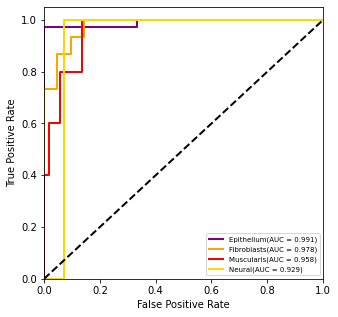

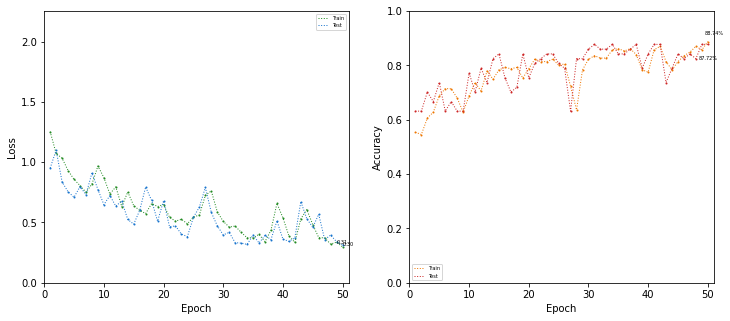

In [6]:
# Metrics
fig = STASCAN.StatPlot.Metric()
fig.ROC_Curve(Module1_output + "/PriorSpot/test/", Module1_output + "/Predict/Rawpredict_detail.txt", label_list, color_list, Module1_output + "/Models/ROC.pdf")
fig.Loss_Accuracy_Curve(Module1_output + "/Models/Log_BaseModel.txt", Module1_output + "/Models/")


/xtdisk/yangyg_group/zhoujy/python/Anaconda/Python-3.7/lib/python3.7/site-packages/PIL/Image.py:2731: DecompressionBombWarning: Image size (97418760 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


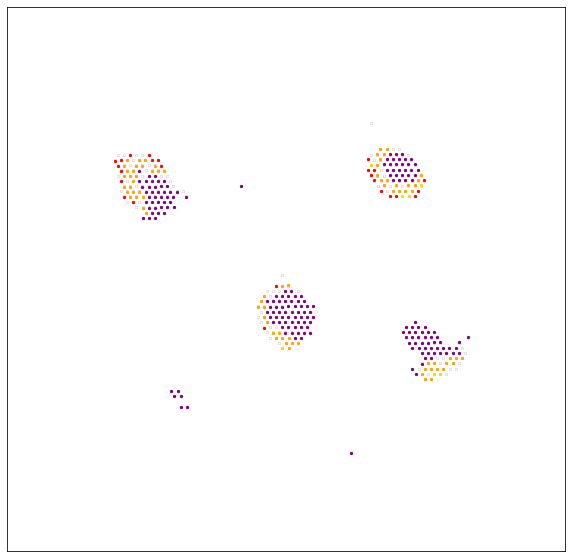

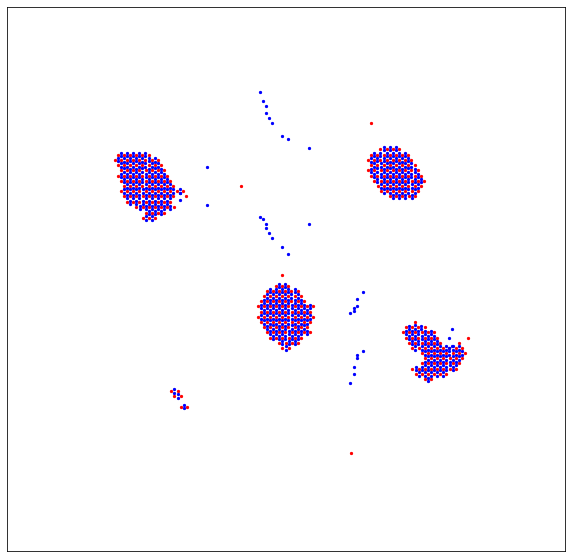

In [7]:
# Check
fig = STASCAN.StatPlot.Check()
fig.Check_PriorSpot(Module1_output + "/ImputedSpot/adjust_raw_spot.txt", Module1_output +  "/PriorSpot/prior_spot.txt", raw_image, dict_label, Module1_output)
fig.Check_ImputedSpot(Module1_output + "/ImputedSpot/adjust_raw_spot.txt", Module1_output + "ImputedSpot/imputed_spot.txt", raw_image, Module1_output)


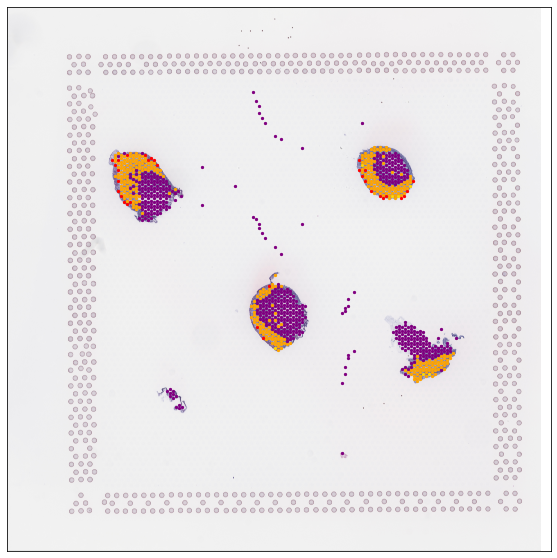

In [8]:
# Visualization
fig = STASCAN.run_STASCAN.Visualization()
fig.EnhancedPlot(Module1_output + "/Predict/Raw_predict.txt", Module1_output + "/PriorSpot/prior_spot.txt", Module1_output + "/Predict/Imputed_predict.txt", raw_image, dict_label, Module1_output)


In [9]:
## Module 2: Cell annotation for subdivided spots

if not os.path.exists(output_path + "/Module2/"):
	os.makedirs(output_path + "/Module2/")
	
Module2_output = output_path + "/Module2/"

# The results will be automatically saved in the default Module2_output path.
run.SubdividedSpot(Module2_output, vignettes_path + "/tissue_positions_list.csv", raw_image, crop_size, vignettes_path, threshold_proportion=0.5, epochs=epochs)



The number of raw spots :  346
The strategy of pre-labelling is: single_proportion
The threshold of cell proportion is: 0.5
The number of prior spots :  156
Found 502 images belonging to 4 classes.
Found 122 images belonging to 4 classes.
{'Epithelium': 0, 'Fibroblasts': 1, 'Muscularis': 2, 'Neural': 3}
{'Epithelium': 0, 'Fibroblasts': 1, 'Muscularis': 2, 'Neural': 3}


/xtdisk/yangyg_group/zhoujy/python/Anaconda/Python-3.7/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/50
16/16 [==============================] - 11s 635ms/step - loss: 1.1288 - accuracy: 0.5896 - val_loss: 0.7579 - val_accuracy: 0.7295
Epoch 2/50
16/16 [==============================] - 7s 408ms/step - loss: 1.0111 - accuracy: 0.7052 - val_loss: 0.8268 - val_accuracy: 0.7295
Epoch 3/50
16/16 [==============================] - 6s 395ms/step - loss: 0.8286 - accuracy: 0.7151 - val_loss: 0.6827 - val_accuracy: 0.7295
Epoch 4/50
16/16 [==============================] - 7s 413ms/step - loss: 0.7143 - accuracy: 0.7211 - val_loss: 0.6401 - val_accuracy: 0.7295
Epoch 5/50
16/16 [==============================] - 7s 403ms/step - loss: 0.6399 - accuracy: 0.7311 - val_loss: 0.6236 - val_accuracy: 0.7787
Epoch 6/50
16/16 [==============================] - 7s 416ms/step - loss: 0.6456 - accuracy: 0.6992 - val_loss: 0.6339 - val_accuracy: 0.7295
Epoch 7/50
16/16 [==============================] - 7s 407ms/step - loss: 0.6252 - accuracy: 0.7251 - val_loss: 0.6347 - val_accuracy: 0.7869
Epoch

1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 32ms/step


/xtdisk/yangyg_group/zhoujy/python/Anaconda/Python-3.7/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


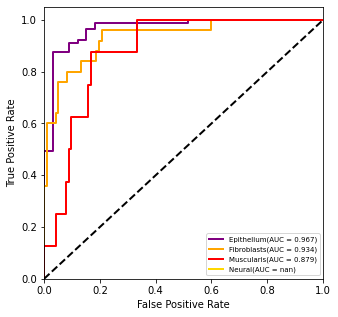

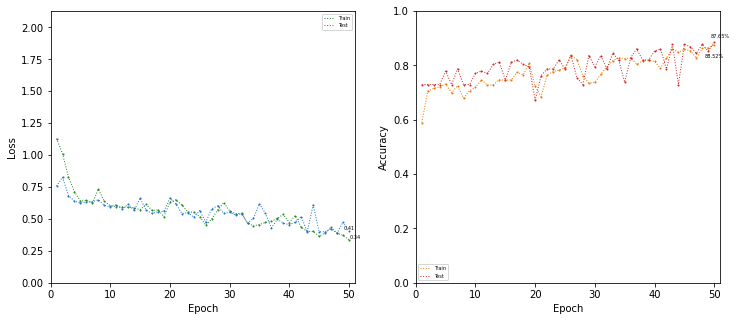

In [10]:
# Metrics
fig = STASCAN.StatPlot.Metric()
fig.ROC_Curve(Module2_output + "/SubSpot/prior_divided/test/", Module2_output + "/Predict/Subdividedpredict_detail.txt", label_list, color_list, Module2_output + "/Models/ROC.pdf")
fig.Loss_Accuracy_Curve(Module2_output + "/Models/Log_BaseModel.txt", Module2_output + "/Models/")


/xtdisk/yangyg_group/zhoujy/python/Anaconda/Python-3.7/lib/python3.7/site-packages/PIL/Image.py:2731: DecompressionBombWarning: Image size (97418760 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


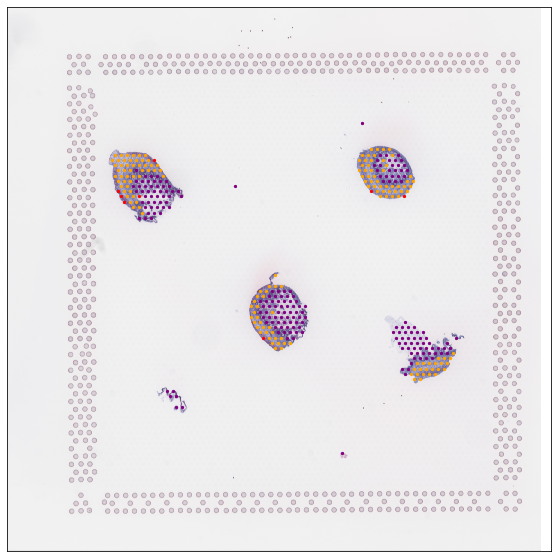

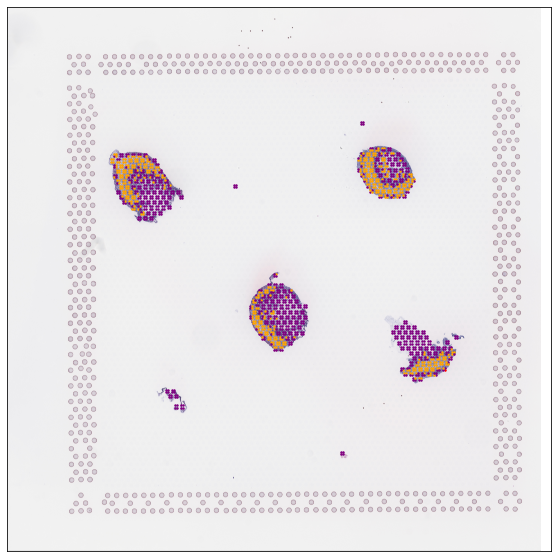

In [7]:
# Visualization

fig = STASCAN.run_STASCAN.Visualization()
fig.SubResolutionPlot(Module1_output+"/Predict/Raw_predict.txt", Module2_output+"/Predict/Subdivided_predict.txt", raw_image, dict_label, Module2_output)


In [15]:
## Module 3: Cell annotation for unseen sections

if not os.path.exists(output_path + "/Module3/"):
	os.makedirs(output_path + "/Module3/")
	
Module3_output = output_path + "/Module3/"

spot_label = [[x] for x in label_list]

run.UnseenSection(Module3_output, vignettes_path+"/Simulated_tissue_positions_list.csv", adjacent_image, crop_size, Module1_output+"/Models/base_model.h5", spot_label)


The number of raw spots :  344
The number of imputed spots :  594
{0: 'Epithelium', 1: 'Fibroblasts', 2: 'Muscularis', 3: 'Neural'}
1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 29ms/step
{0: 'Epithelium', 1: 'Fibroblasts', 2: 'Muscularis', 3: 'Neural'}
1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 32ms/step


/xtdisk/yangyg_group/zhoujy/python/Anaconda/Python-3.7/lib/python3.7/site-packages/PIL/Image.py:2731: DecompressionBombWarning: Image size (96904800 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


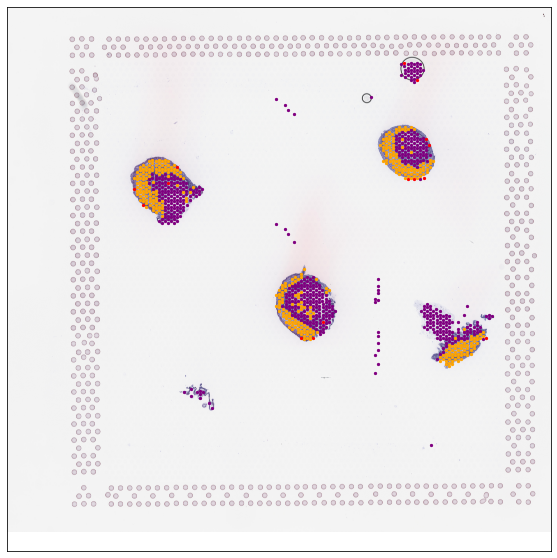

In [16]:
# Visualization
fig = STASCAN.run_STASCAN.Visualization()
fig.AdjacentSectionPlot(Module3_output+"/Predict/Adjacent_raw_predict.txt", Module3_output+"/Predict/Adjacent_imputed_predict.txt", adjacent_image, dict_label, Module3_output)
